In [58]:
import numpy as np
import pandas as pd

data = pd.read_csv("tripadvisor_hotel_reviews.csv")

In [59]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
data.columns

Index(['Review', 'Rating'], dtype='object')

In [69]:
for i in range(len(data)):
    data['Review Length'][i] = len(data['Review'][i])

<ipython-input-69-0ca2a53c9c93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review Length'][i] = len(data['Review'][i])


In [71]:
data.head()

,Review,Rating,Review Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


In [72]:
data['Rating'].describe()

count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [73]:
data['Review Length'].describe()

count    20491.000000
mean       724.896833
std        689.101024
min         44.000000
25%        339.000000
50%        537.000000
75%        859.000000
max      13501.000000
Name: Review Length, dtype: float64

In [74]:
%matplotlib inline

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

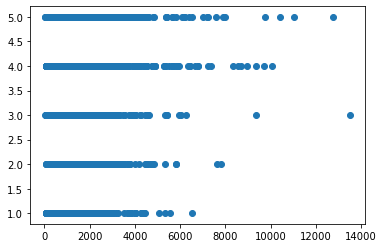

In [81]:
plt.scatter(x = data['Review Length'], y = data['Rating'])

(array([1421., 1793., 2184., 6039., 9054.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

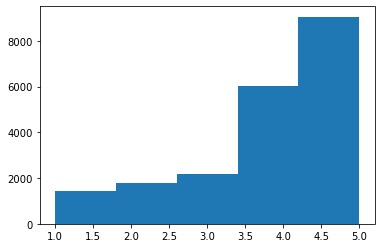

In [89]:
plt.hist(data['Rating'], bins = 5)

In [90]:
data_p = data[data['Review Length'] < 1640]  

In [92]:
data_p['Review Length'].describe()

count    19042.000000
mean       583.753965
std        336.924410
min         44.000000
25%        327.000000
50%        505.000000
75%        765.000000
max       1639.000000
Name: Review Length, dtype: float64

In [93]:
print(20431-19042)

1389


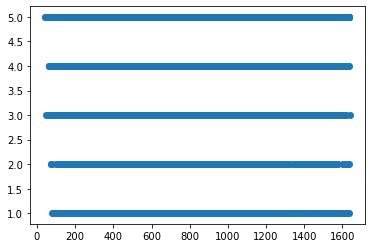

In [94]:
plt.scatter(x = data_p['Review Length'], y = data_p['Rating'])

In [108]:
data_1 = data_p[data_p['Rating'] == 1]  
data_2 = data_p[data_p['Rating'] == 2]
data_3 = data_p[data_p['Rating'] == 3]  
data_4 = data_p[data_p['Rating'] == 4]
data_5 = data_p[data_p['Rating'] == 5]

In [109]:
data_1.describe()

,Rating,Review Length
count,1302.0,1302.000000
mean,1.0,610.816436
std,0.0,355.847951
min,1.0,77.000000
25%,1.0,339.000000
50%,1.0,529.000000
75%,1.0,803.750000
max,1.0,1634.000000


In [110]:
data_2.describe()

,Rating,Review Length
count,1601.0,1601.000000
mean,2.0,664.851968
std,0.0,341.465888
min,2.0,74.000000
25%,2.0,409.000000
50%,2.0,605.000000
75%,2.0,858.000000
max,2.0,1635.000000


In [111]:
data_3.describe()

,Rating,Review Length
count,2002.0,2002.000000
mean,3.0,619.874126
std,0.0,344.155618
min,3.0,47.000000
25%,3.0,356.500000
50%,3.0,546.500000
75%,3.0,811.000000
max,3.0,1639.000000


In [112]:
data_4.describe()

,Rating,Review Length
count,5567.0,5567.000000
mean,4.0,586.310401
std,0.0,337.798852
min,4.0,61.000000
25%,4.0,327.000000
50%,4.0,506.000000
75%,4.0,769.000000
max,4.0,1637.000000


In [113]:
data_5.describe()

,Rating,Review Length
count,8570.0,8570.000000
mean,5.0,554.393699
std,0.0,327.048631
min,5.0,44.000000
25%,5.0,309.000000
50%,5.0,473.000000
75%,5.0,720.000000
max,5.0,1637.000000


In [119]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

regr.fit(data_p[['Review Length']], data_p[['Rating']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[-0.0003189]]


In [121]:
y_pred = regr.predict(data_p[['Review Length']])

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(data_p[['Rating']], y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(data_p[['Rating']], y_pred))

Coefficients: 
 [[-0.0003189]]
Mean squared error: 1.49
Coefficient of determination: 0.01
